In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as p

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)
EPOCHS = 100

df = pd.read_table('tested.csv', sep = ',')

In [2]:
#wyświetl df
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
#wyświelt podsumowanie df za pomocą describe. Co jest alarmujące?
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
df['Cabin'].isna().sum()

327

In [5]:
#wyrzuć z df te kolumny, które prawdopodobnie nic nie wnoszą
df = df.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis = 1)

In [6]:
#wyświetl df
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [7]:
#użyj one-hot encoding na danych nominalnych
temp = pd.get_dummies(df.Sex, prefix = 'is')

In [8]:
temp

,is_female,is_male
0,False,True
1,True,False
2,False,True
3,False,True
4,True,False
...,...,...
413,False,True
414,True,False
415,False,True
416,False,True


In [9]:
df['is Female']=temp['is_female']

In [10]:
#wyświetl df
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is Female
0,0,3,male,34.5,0,0,7.8292,Q,False
1,1,3,female,47.0,1,0,7.0000,S,True
2,0,2,male,62.0,0,0,9.6875,Q,False
3,0,3,male,27.0,0,0,8.6625,S,False
4,1,3,female,22.0,1,1,12.2875,S,True
...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S,False
414,1,1,female,39.0,0,0,108.9000,C,True
415,0,3,male,38.5,0,0,7.2500,S,False
416,0,3,male,NaN,0,0,8.0500,S,False


In [11]:
#usuń nadmiarowe kolumny
df = df.drop(['Sex'], axis=1)

In [12]:
#wyświetl df
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,is Female
0,0,3,34.5,0,0,7.8292,Q,False
1,1,3,47.0,1,0,7.0000,S,True
2,0,2,62.0,0,0,9.6875,Q,False
3,0,3,27.0,0,0,8.6625,S,False
4,1,3,22.0,1,1,12.2875,S,True
...,...,...,...,...,...,...,...,...
413,0,3,NaN,0,0,8.0500,S,False
414,1,1,39.0,0,0,108.9000,C,True
415,0,3,38.5,0,0,7.2500,S,False
416,0,3,NaN,0,0,8.0500,S,False


In [13]:
temp_em = pd.get_dummies(df.Embarked, prefix = 'is')
temp_em

,is_C,is_Q,is_S
0,False,True,False
1,False,False,True
2,False,True,False
3,False,False,True
4,False,False,True
...,...,...,...
413,False,False,True
414,True,False,False
415,False,False,True
416,False,False,True


In [14]:
df['Embarked_C'] = temp_em["is_C"] 

In [15]:
df['Embarked_Q'] = temp_em["is_Q"]

In [16]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,is Female,Embarked_C,Embarked_Q
0,0,3,34.5,0,0,7.8292,Q,False,False,True
1,1,3,47.0,1,0,7.0000,S,True,False,False
2,0,2,62.0,0,0,9.6875,Q,False,False,True
3,0,3,27.0,0,0,8.6625,S,False,False,False
4,1,3,22.0,1,1,12.2875,S,True,False,False
...,...,...,...,...,...,...,...,...,...,...
413,0,3,NaN,0,0,8.0500,S,False,False,False
414,1,1,39.0,0,0,108.9000,C,True,True,False
415,0,3,38.5,0,0,7.2500,S,False,False,False
416,0,3,NaN,0,0,8.0500,S,False,False,False


In [24]:
df = df.drop(['Embarked'], axis = 1)

In [25]:
#wypełnij braki danych w kolumne Age za pomocą sredniej wartości z tej kolumny

mean_value = df["Age"].mean()
df = df.fillna(mean_value)

In [26]:
#skalujemy do wartości 0-1 tylko wybrane kolumny. W tej komórce nie musisz nic robić
cols_to_scale = ['Pclass','Age','Fare']

scaler = p.StandardScaler().fit(df[cols_to_scale])

df[cols_to_scale] = scaler.transform(df[cols_to_scale])

In [27]:
#wyświelt df
df

,Survived,Pclass,Age,SibSp,Parch,Fare,is Female,Embarked_C,Embarked_Q
0,0,0.873482,3.349926e-01,0,0,-0.498172,False,False,True
1,1,0.873482,1.325530e+00,1,0,-0.513039,True,False,False
2,0,-0.315819,2.514175e+00,0,0,-0.464854,False,False,True
3,0,0.873482,-2.593299e-01,0,0,-0.483231,False,False,False
4,1,0.873482,-6.555448e-01,1,1,-0.418237,True,False,False
...,...,...,...,...,...,...,...,...,...
413,0,0.873482,-3.187243e-17,0,0,-0.494213,False,False,False
414,1,-1.505120,6.915861e-01,0,0,1.313968,True,True,False
415,0,0.873482,6.519646e-01,0,0,-0.508557,False,False,False
416,0,0.873482,-3.187243e-17,0,0,-0.494213,False,False,False


In [28]:
#podział df na dane i labele 
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'is Female', 'Embarked_C', 'Embarked_Q']]
y = df[['Survived']]

In [75]:
#podziel X i y na zbiory uczące i testowe za pomocą train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

In [76]:
#zbuduj modej sieci. W tym przypadku ostatnia warstwa powinna mieć jeden neuron i sigmoidalną funkcję aktywacji

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input

model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(36, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [77]:
#binary_crossentropy bo mamy tylko jeden neuron z sigmoidalną funkcją aktywacji
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=["accuracy"])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               1152      
                                                                 
 dense_37 (Dense)            (None, 36)                4644      
                                                                 
 dense_38 (Dense)            (None, 1)                 37        
                                                                 
Total params: 5,833
Trainable params: 5,833
Non-trainable params: 0
_________________________________________________________________


In [78]:
#naucz sieć
history = model.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_test, y_test), callbacks = [es])

Epoch 1/100
11/11 [==============================] - 1s 26ms/step - loss: 0.6491 - accuracy: 0.6347 - val_loss: 0.6125 - val_accuracy: 0.7262
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.5642 - accuracy: 0.7964 - val_loss: 0.5325 - val_accuracy: 0.8690
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4824 - accuracy: 0.9281 - val_loss: 0.4464 - val_accuracy: 0.9167
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.3913 - accuracy: 0.9790 - val_loss: 0.3504 - val_accuracy: 0.9524
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.2965 - accuracy: 0.9940 - val_loss: 0.2636 - val_accuracy: 0.9881
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.2107 - accuracy: 1.0000 - val_loss: 0.1817 - val_accuracy: 1.0000
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 0.1407 - accuracy: 1.0000 - val_loss: 0.1276 - val_accuracy: 1.0000
Epoch 8/100


11/11 [==============================] - 0s 3ms/step - loss: 4.3550e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 59/100
11/11 [==============================] - 0s 4ms/step - loss: 4.1971e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 60/100
11/11 [==============================] - 0s 4ms/step - loss: 4.0482e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 61/100
11/11 [==============================] - 0s 5ms/step - loss: 3.9093e-04 - accuracy: 1.0000 - val_loss: 9.8281e-04 - val_accuracy: 1.0000
Epoch 62/100
11/11 [==============================] - 0s 5ms/step - loss: 3.7774e-04 - accuracy: 1.0000 - val_loss: 9.5582e-04 - val_accuracy: 1.0000
Epoch 63/100
11/11 [==============================] - 0s 4ms/step - loss: 3.6543e-04 - accuracy: 1.0000 - val_loss: 9.3672e-04 - val_accuracy: 1.0000
Epoch 64/100
11/11 [==============================] - 0s 4ms/step - loss: 3.5295e-04 - accuracy: 1.0000 - val_loss: 9.0344e-0

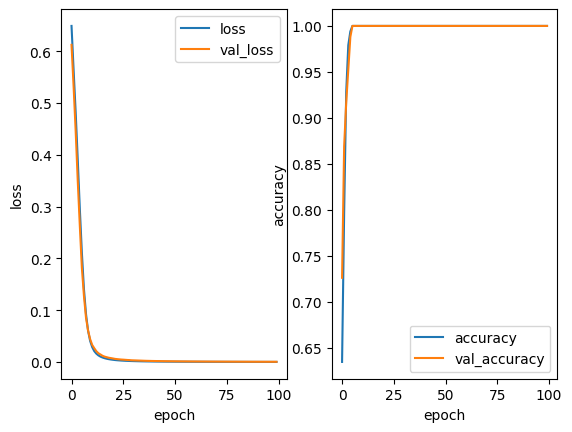

In [79]:
#wyświetl wykresy uczenia
hist = pd.DataFrame(history.history)
hist

plt.subplot(1,2,1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist.accuracy, label = "accuracy")
plt.plot(hist.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()